In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('Downloads/Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df.shape

(400, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [21]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


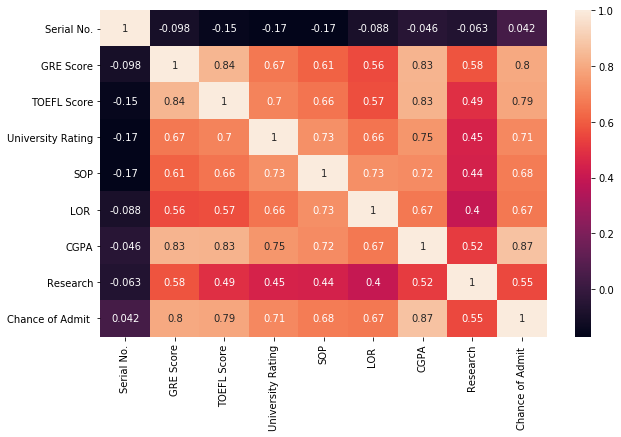

In [22]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(), annot=True)

In [23]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [32]:
# dropping the 'Chance of Admit' and 'serial number' as they are not going to be used as features for prediction

x = df.iloc[:,1:8]

x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [36]:
## 'Chance of Admit' is the target column which shows the probability of admission for a candidate

y = df.iloc[:,-1]

y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

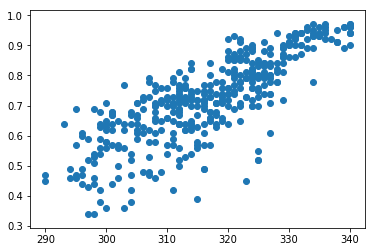

In [37]:
plt.scatter(df['GRE Score'],y) # Relationship between GRE Score and Chance of Admission

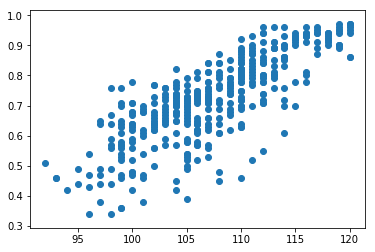

In [38]:
plt.scatter(df['TOEFL Score'],y) # Relationship between TOEFL Score and Chance of Admission

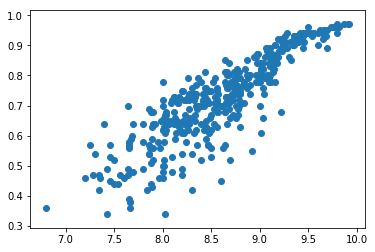

In [39]:
plt.scatter(df['CGPA'],y) # Relationship between CGPA and Chance of Admission

In [40]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split 

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=100)

In [41]:
# fitting the date to the Linear regression model

from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# calculating the accuracy of the model

from sklearn.metrics import r2_score 

score= r2_score(reg.predict(test_x),test_y)

score

0.7727846883591631

In [45]:
import statsmodels as sm

import statsmodels.formula.api as smf

In [46]:
model = smf.ols('y~x',df)

model

In [47]:
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 13 May 2020   Prob (F-statistic):          3.12e-134
Time:                        16:20:40   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2594      0.125    -10.097      0.0